Data comes from Common Voice Database. As intended it was necessary to select about 30 speakers. So the first step was to get familiar with characteristics of the recordings and the speakers.

First, I installed:

```bash
pip install librosa
pip install pydub
pip install pysoundfile
pip install playsound
```

In [24]:
!pip install librosa
!pip install pydub
!pip install pysoundfile
!pip install playsound

In [25]:
import pandas as pd 
import librosa
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from pydub import AudioSegment
import librosa.display

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv("/content/drive/MyDrive/SpeakerRecognition/train.tsv", sep='\t') 

I checked how many recordings came from each of the speakers.

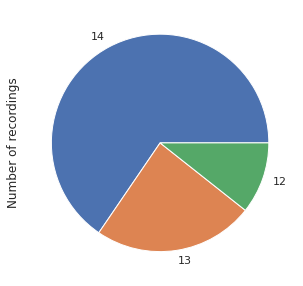

In [28]:
counts = df['client_id'].value_counts()
stat = counts.value_counts()
stat = stat.rename(level = 0, index = 'Number of recordings')
result = stat.rename(level = 0, index = 'Number of recordings')
plot = stat.plot.pie(figsize=(5, 5))

I left only speakers with 14 recordings and changed  the client ids into format voice1, voice2, etc. 

In [29]:
client_list= df["client_id"]

a={}
for i in client_list:
    if i not in a.keys():
      a[i] = 1
    else:
      a[i] += 1

id_list = list()
for k, v in a.items():
  if v == 14:
    id_list.append(k)
for index, row in df.iterrows():
  if df['client_id'][index] not in id_list:
    df.drop(index, axis=0, inplace=True)

i=0
replacement_mapping_dict = {}
for k, v in a.items():
    replacement_mapping_dict[k] = 'voice' + str(i)
    i+=1
df["client_id"] = df["client_id"].replace(replacement_mapping_dict, regex=True)

In [30]:
df

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
5267,voice415,common_voice_en_22190881.mp3,seven,2,0,NaN,NaN,NaN,en,Benchmark
5268,voice415,common_voice_en_22190883.mp3,four,2,1,NaN,NaN,NaN,en,Benchmark
5269,voice415,common_voice_en_22190884.mp3,no,2,0,NaN,NaN,NaN,en,Benchmark
5270,voice415,common_voice_en_22190885.mp3,three,2,0,NaN,NaN,NaN,en,Benchmark
5271,voice415,common_voice_en_22190887.mp3,six,2,0,NaN,NaN,NaN,en,Benchmark
...,...,...,...,...,...,...,...,...,...,...
16280,voice1201,common_voice_en_22090684.mp3,four,2,1,NaN,NaN,NaN,en,Benchmark
16281,voice1201,common_voice_en_22090691.mp3,no,3,0,NaN,NaN,NaN,en,Benchmark
16282,voice1201,common_voice_en_22090696.mp3,one,3,0,NaN,NaN,NaN,en,Benchmark
16283,voice1201,common_voice_en_22090698.mp3,yes,2,0,NaN,NaN,NaN,en,Benchmark


In [31]:
df=df.reset_index()
df.pop('index')
df=df.fillna(0)

Currently, the collection includes recordings from 1,201 speakers.

### Dataset characteristics

In [32]:
print('Accent')
print(df['accent'].value_counts())
print("\nGender")
print(df['gender'].value_counts())
print("\nAge")
print(df['age'].value_counts())
print("\nSentence")
print(df['sentence'].value_counts())
print("\nDown votes")
print(df['down_votes'].value_counts())

Accent
0              6902
us             2058
england         784
indian          336
canada          294
australia       280
hongkong         70
ireland          70
philippines      56
scotland         42
african          42
newzealand       42
malaysia         28
singapore        14
Name: accent, dtype: int64

Gender
0         4956
male      4326
female    1540
other      196
Name: gender, dtype: int64

Age
0            4886
twenties     2422
thirties     1134
teens         896
fourties      630
fifties       616
sixties       280
seventies     140
eighties       14
Name: age, dtype: int64

Sentence
seven      787
four       787
no         787
three      787
six        787
yes        787
nine       787
one        787
Firefox    787
Hey        787
zero       787
two        787
eight      787
five       787
Name: sentence, dtype: int64

Down votes
0    9325
1    1551
2     122
3      19
4       1
Name: down_votes, dtype: int64


I decided to limit the dataset with conditions:
1) no accent
2) only men (due to more recordings in the set)
3) only twenties
4) down votes less than 2

In [33]:
client=list()
path=list()
sentence=list()
up=list()
down=list()
age=list()
gender=list() 
accent =list()

for index, row in df.iterrows():
  if df['accent'][index] == 0 and df['age'][index] == 'twenties' and df['gender'][index] == 'male' and df['down_votes'][index] < 2:
    client.append(df['client_id'][index])
    path.append(df['path'][index])
    sentence.append(df['sentence'][index])
    up.append(df['up_votes'][index])
    down.append(df['down_votes'][index])
    age.append(df['age'][index])
    gender.append(df['gender'][index])
    accent.append(df['accent'][index])

data = list(zip(client, path, sentence, up, down, age, gender, accent)) 
df = pd.DataFrame(data, columns = ['client_id', 'path', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent'])

I checked again whether the dataset contains exactly 14 recordings of speakers. 

In [34]:
client_list= df["client_id"]

a={}
a[df["client_id"][0]]=1
for i in client_list:
    if i not in a.keys():
      a[i] = 1
    else:
      a[i] += 1

id_list = list()
for k, v in a.items():
  if v == 14:
    id_list.append(k)
for index, row in df.iterrows():
  if df['client_id'][index] not in id_list:
    df.drop(index, axis=0, inplace=True)

In [35]:
df=df.reset_index()
df.pop('index')

0       14
1       15
2       16
3       17
4       18
      ... 
471    574
472    575
473    576
474    577
475    578
Name: index, Length: 476, dtype: int64

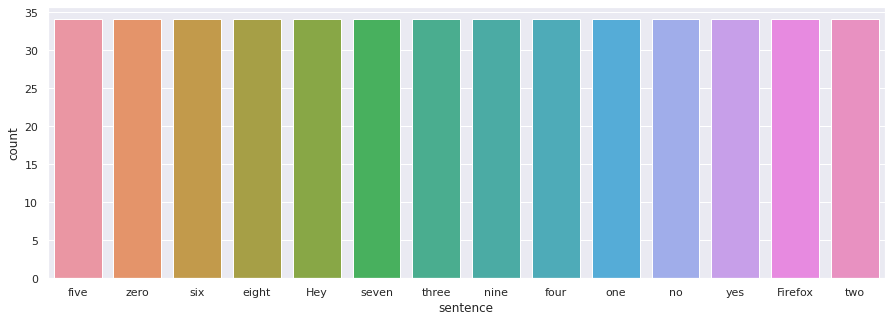

In [36]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="sentence", 
        data=df[df['sentence'].notna()])
plt.show()

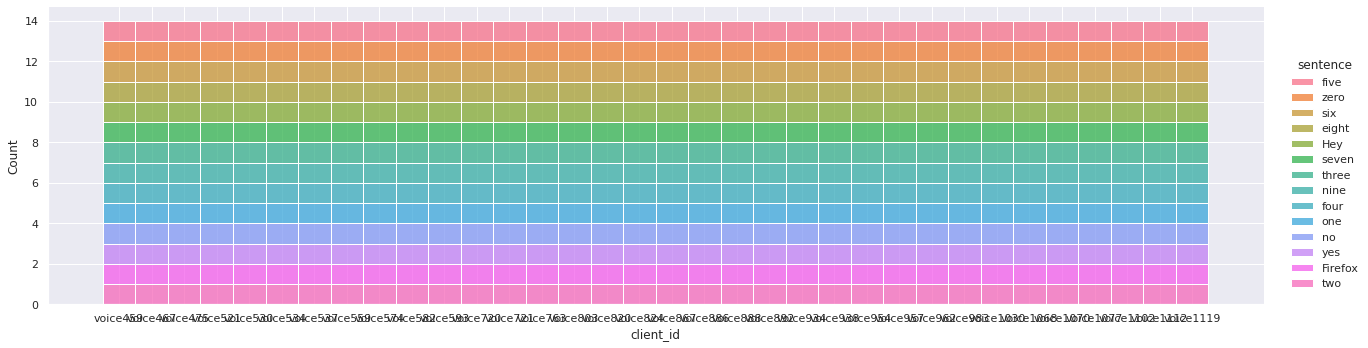

In [37]:
sns.displot(x="client_id", 
        data=df[df['client_id'].notna()], 
        hue='sentence',
        multiple='stack',
        height=5, aspect=18/5)
plt.show()

In [38]:
df = df[['client_id','path','sentence']]
data = df[df['client_id'].notna() & df['sentence'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,client_id,path,sentence
0,voice459,common_voice_en_22006234.mp3,five
1,voice459,common_voice_en_22006235.mp3,zero
2,voice459,common_voice_en_22006237.mp3,six
3,voice459,common_voice_en_22006238.mp3,eight
4,voice459,common_voice_en_22006239.mp3,Hey


I changed ids of the 34 speakers left in dataset in order to make futher work easier. 

In [39]:
client_list= data["client_id"]

a={}
for i in client_list:
    if i not in a.keys():
      a[i] = 1
    else:
      a[i] += 1

num=1
replacement_mapping_dict = {}
for k, v in a.items():
    replacement_mapping_dict[k] = 'voice' + str(num)
    num+=1

data["client_id"] = data["client_id"].replace(replacement_mapping_dict, regex=True)

In [40]:
data['label'] = data['client_id']
cleanup_nums = {"label": {"voice1":0,"voice2":1,"voice3":2, "voice4":3, "voice5":4, "voice6":5, "voice7":6, "voice8":7, "voice9":8, "voice10":9, "voice11":10, "voice12":11, "voice13":12, 'voice14':13, 'voice15':14,'voice16':15,'voice17':16,'voice18':17,'voice19':18, "voice20":19,"voice21":20,"voice22":21, "voice23":22, "voice24":23, "voice25":24, "voice26":25, "voice27":26,  "voice28":27, "voice29":28, "voice30":29, "voice31":30, "voice32":31, "voice33":32,  "voice34":33}}
data = data.replace(cleanup_nums)
data.head()

,client_id,path,sentence,label
0,voice1,common_voice_en_22006234.mp3,five,0
1,voice1,common_voice_en_22006235.mp3,zero,0
2,voice1,common_voice_en_22006237.mp3,six,0
3,voice1,common_voice_en_22006238.mp3,eight,0
4,voice1,common_voice_en_22006239.mp3,Hey,0


In [41]:
data['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

The data was organized by speakers and this is no conductive to effective classification. Therefore the data order has been mixed up. 

In [42]:
data = data.sample(frac=1).reset_index(drop=True)
data

,client_id,path,sentence,label
0,voice7,common_voice_en_22125662.mp3,zero,6
1,voice34,common_voice_en_22046637.mp3,seven,33
2,voice23,common_voice_en_22207175.mp3,Hey,22
3,voice19,common_voice_en_22071426.mp3,five,18
4,voice13,common_voice_en_21925175.mp3,Firefox,12
...,...,...,...,...
471,voice22,common_voice_en_22044214.mp3,Firefox,21
472,voice20,common_voice_en_22159882.mp3,no,19
473,voice30,common_voice_en_22108997.mp3,one,29
474,voice28,common_voice_en_21917136.mp3,eight,27


Finally, I saved the data frame as a file to have easy access to the selected recordings labels.

In [43]:
!rm -f /content/drive/MyDrive/en/data.csv
data.to_csv('/content/drive/MyDrive/SpeakerRecognition/data.csv', index=False)